# Explore here

In [ ]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# 1) Connect to the database here using the SQLAlchemy's create_engine function

# 2) Execute the SQL sentences to create your tables using the SQLAlchemy's execute function

# 3) Execute the SQL sentences to insert your data using the SQLAlchemy's execute function

# 4) Use pandas to print one of the tables as dataframes using read_sql function

In [1]:
pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.5 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [57]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import pandas as pd

In [58]:
# Ruta completa al archivo .env
dotenv_path = "/workspaces/interacting-with-api-python-project-tutorial/src/api.env"

# Cargar variables de entorno desde el archivo .env
load_dotenv(dotenv_path)

# Obtener las credenciales del cliente de Spotify desde las variables de entorno
client_id = os.getenv("SPOTIFY_CLIENT_ID")
client_secret = os.getenv("SPOTIFY_CLIENT_SECRET")
spotipy.Spotify()

In [63]:
# Configurar las credenciales del cliente de Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# ID de Stromae
id_stromae = "5j4HeCoUlzhfWtjAfM1acR"

# Obtener las mejores pistas del artista Stromae
response = sp.artist_top_tracks(id_stromae)
if response:
    tracks = response["tracks"]
    # Crear una lista para almacenar los detalles de las pistas
    tracks_data = []
    # Iterar sobre cada pista y obtener detalles
    for track in tracks:
        name = track["name"]
        popularity = track["popularity"]
        duration_ms = track["duration_ms"]  # Duración en milisegundos
        duration_sec = duration_ms / 1000  # Convertir a segundos
        
         # Agregar los detalles de la pista a la lista de datos de pistas
        tracks_data.append({
            "Nombre": name,
            "Popularidad": popularity,
            "Duración (segundos)": duration_sec
        })
        # Imprimir detalles de la pista
        print(f"Canción: {name}")
        print(f"Popularidad: {popularity}")
        print(f"Duración: {duration_sec} segundos\n")
else:
    print("No se encontraron pistas principales para el artista.")


Canción: Alors on danse - Radio Edit
Popularidad: 79
Duración: 206.066 segundos

Canción: Formidable
Popularidad: 50
Duración: 213.933 segundos

Canción: Papaoutai
Popularidad: 54
Duración: 232.146 segundos

Canción: Tous les mêmes
Popularidad: 55
Duración: 210.933 segundos

Canción: Alors On Danse - DubDogz Remix
Popularidad: 71
Duración: 168.576 segundos

Canción: Santé
Popularidad: 63
Duración: 191.0 segundos

Canción: L’enfer
Popularidad: 59
Duración: 189.72 segundos

Canción: Fils de joie
Popularidad: 61
Duración: 195.44 segundos

Canción: Ta fête
Popularidad: 42
Duración: 175.426 segundos

Canción: carmen
Popularidad: 43
Duración: 189.026 segundos



In [65]:
# Crear un DataFrame de pandas a partir de la lista de datos de pistas
df = pd.DataFrame(tracks_data)
print(df)

                           Nombre  Popularidad  Duración (segundos)
0     Alors on danse - Radio Edit           79              206.066
1                      Formidable           50              213.933
2                       Papaoutai           54              232.146
3                  Tous les mêmes           55              210.933
4  Alors On Danse - DubDogz Remix           71              168.576
5                           Santé           63              191.000
6                         L’enfer           59              189.720
7                    Fils de joie           61              195.440
8                         Ta fête           42              175.426
9                          carmen           43              189.026


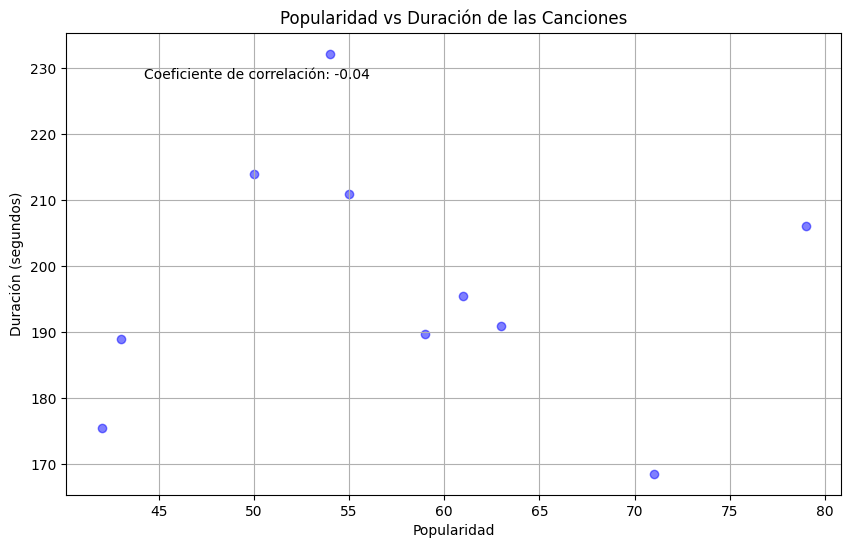

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular el coeficiente de correlación de Pearson
correlation = df["Popularidad"].corr(df["Duración (segundos)"])

# scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(df["Popularidad"], df["Duración (segundos)"], color='blue', alpha=0.5)
plt.title('Popularidad vs Duración de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Duración (segundos)')
plt.grid(True)
    
# Mostrar el coeficiente de correlación en la salida
plt.text(0.1, 0.9, f'Coeficiente de correlación: {correlation:.2f}', transform=plt.gca().transAxes)
    
plt.show()